# Desafio Bônus: 
Com base nos dados dos exercícios anteriores, me desafiei a criar alguns cenários para análise.

# Conexão e importação de dados

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
caminho_bd = '../data/bootcampDB.db'
conexao = sqlite3.connect(caminho_bd)

In [3]:
# Comando SQL
comando_sql = """
    SELECT com.id,
           com.produto,
           com.valor,
           com.cliente_id,
           cli.nome,
           cli.idade,
           cli.saldo,
           CASE
             WHEN cli.idade BETWEEN 1 AND 20 THEN '1 a 20'
             WHEN cli.idade BETWEEN 21 AND 40 THEN '21 a 40'
             WHEN cli.idade BETWEEN 41 AND 60 THEN '41 a 60'
             ELSE 'acima de 60'
           END AS faxa_etaria
    FROM   clientes cli
           JOIN compras com
             ON cli.id = com.cliente_id
    ORDER  BY cli.id,
              com.id  
"""

# Criação do dataframe
df = pd.read_sql_query(comando_sql, conexao)
df.head()

,id,produto,valor,cliente_id,nome,idade,saldo,faxa_etaria
0,22,Smartphone modelo X,500.0,1,João Silva,30,500.95,21 a 40
1,38,Laptop modelo Y,1800.0,1,João Silva,30,500.95,21 a 40
2,9,Laptop modelo Y,1800.0,2,Maria Oliveira,25,277.80,21 a 40
3,21,Smartwatch modelo Z,250.5,2,Maria Oliveira,25,277.80,21 a 40
4,4,Laptop modelo Y,1800.0,3,Pedro Santos,40,875.00,21 a 40


# 01
Quais são os produtos mais comprados em termos de quantidade?

In [4]:
# Dataframe
produtos_por_quantidade = df['produto'].value_counts().sort_values(ascending=False).nlargest(5)
produtos_por_quantidade

produto
Laptop modelo Y            17
Smartphone modelo X        11
Fone de ouvido modelo A     4
Smartwatch modelo Z         3
Tablet modelo B             3
Name: count, dtype: int64

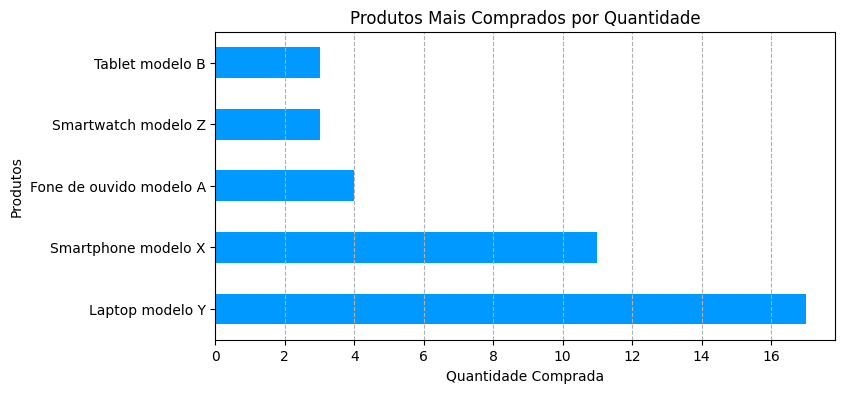

In [5]:
# Gráfico
plt.figure(figsize=(8, 4))

produtos_por_quantidade.plot(kind='barh', color='#0099ff')

plt.xlabel('Quantidade Comprada')
plt.ylabel('Produtos')
plt.title('Produtos Mais Comprados por Quantidade')
plt.grid(axis='x', linestyle='--')

plt.show()

# 02
Quais são os produtos que geraram a maior receita total em vendas?

In [6]:
# Dataframe
produtos_por_receita = df.groupby('produto')['valor'].sum().sort_values(ascending=False).nlargest(5)
produtos_por_receita

produto
Laptop modelo Y        30600.0
Tablet modelo B        10500.0
Smartphone modelo X     5500.0
Smartphone modelo Z     1800.0
Smartwatch modelo Z      751.5
Name: valor, dtype: float64

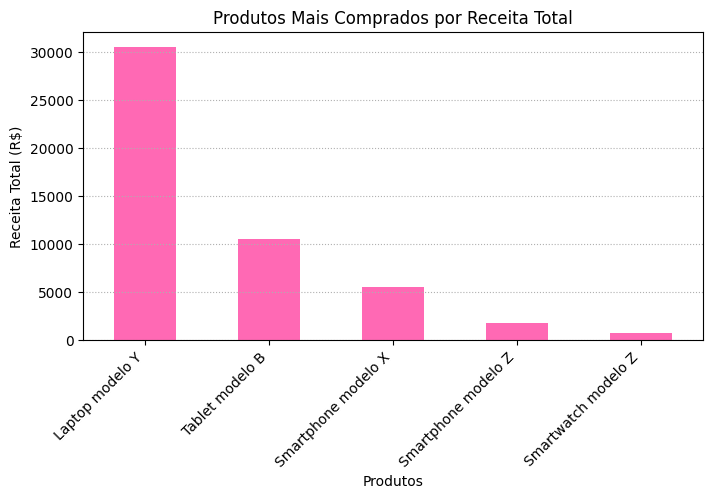

In [7]:
# Gráfico
plt.figure(figsize=(8, 4))

produtos_por_receita.plot(kind='bar', color='#FF69B4')

plt.xlabel('Produtos')
plt.ylabel('Receita Total (R$)')
plt.title('Produtos Mais Comprados por Receita Total')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle=':')

plt.show()

# 03
Qual a distribuição de saldo dos clientes?

In [8]:
#  DataFrame
df.groupby('cliente_id')['saldo'].mean().sort_values()

cliente_id
12       98.00
2       277.80
13      440.15
1       500.95
3       875.00
8      1700.25
4      1800.25
10     2100.00
5      2200.50
14     2300.00
7      2500.75
9      2600.50
15     2900.75
6      3000.00
11     3200.75
16     3400.25
17     3600.50
19     3800.75
20     4000.25
21    12000.00
Name: saldo, dtype: float64

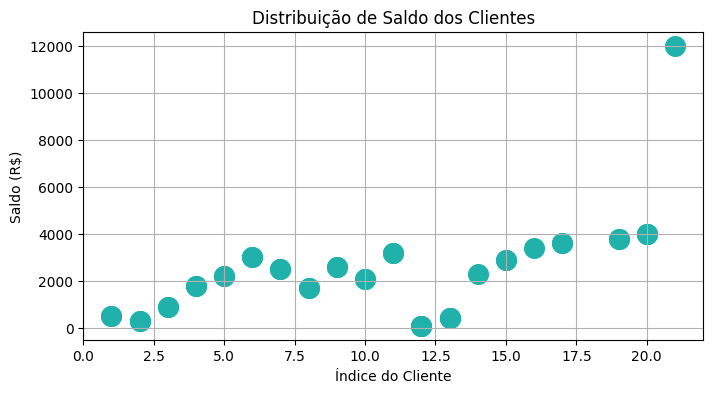

In [9]:
# Gráfico
plt.figure(figsize=(8, 4))

plt.scatter(df['cliente_id'], df['saldo'], color='#20B2AA', s=200)

plt.xlabel('Índice do Cliente')
plt.ylabel('Saldo (R$)')
plt.title('Distribuição de Saldo dos Clientes')
plt.grid(True, linestyle='-')

plt.show()

# 04
Qual é a distribuição percentual de clientes por faixa etária?

In [10]:
# Dataframe
clientes_faxa_etaria = df['faxa_etaria'].value_counts().sort_index()
clientes_faxa_etaria

faxa_etaria
1 a 20          1
21 a 40        29
41 a 60         9
acima de 60     1
Name: count, dtype: int64

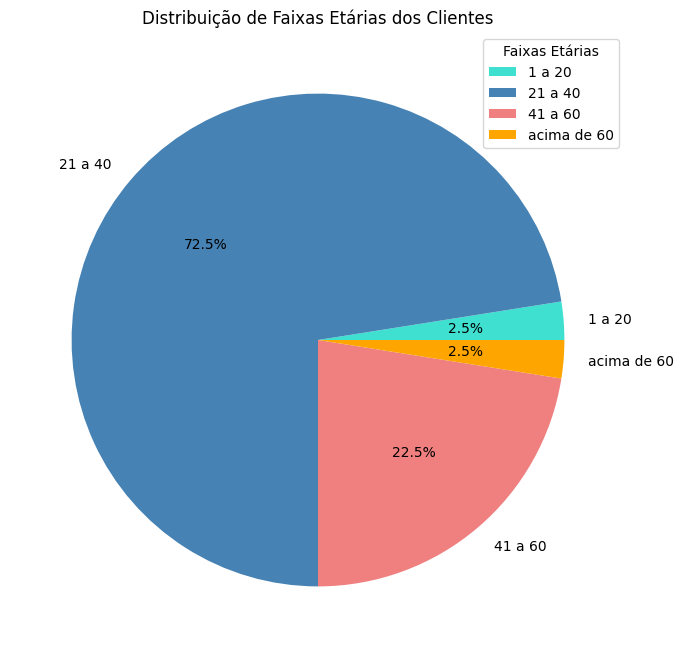

In [11]:
# Gráfico
cores = ['#40E0D0', '#4682B4', '#F08080', '#FFA500']

plt.figure(figsize=(8, 8))

plt.pie(clientes_faxa_etaria, labels=clientes_faxa_etaria.index, autopct='%1.1f%%', colors=cores)
plt.title('Distribuição de Faixas Etárias dos Clientes')
plt.legend(title='Faixas Etárias')

plt.show()

# 05
Qual a média de compras por faixa etária dos clientes?

In [12]:
# Dataframe
media_compras_por_faixa_etaria = df.groupby('faxa_etaria')['valor'].mean().sort_values(ascending=False).round(2)
media_compras_por_faixa_etaria

faxa_etaria
1 a 20         1800.00
acima de 60    1800.00
41 a 60        1222.20
21 a 40        1205.22
Name: valor, dtype: float64

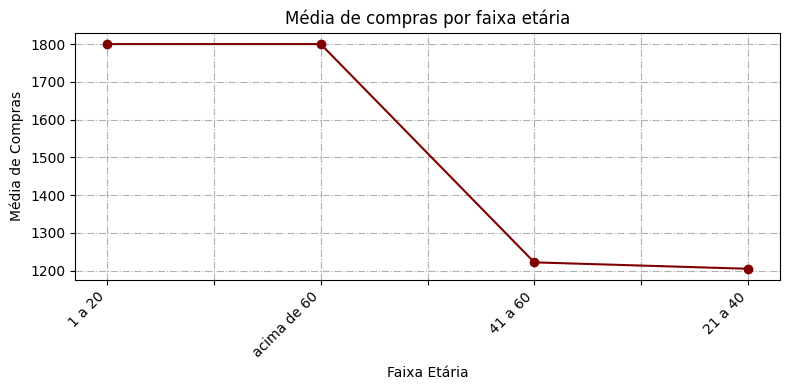

In [13]:
# Gráfico
plt.figure(figsize=(8, 4))

media_compras_por_faixa_etaria.plot(kind='line', marker='o', color='#800000')

plt.xlabel('Faixa Etária')
plt.ylabel('Média de Compras')
plt.title('Média de compras por faixa etária')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='-.')
plt.tight_layout()

plt.show()

# 06
Existe alguma relação entre a distribuição do saldo dos clientes e sua faixa etária?


In [14]:
# Dataframe
media_saldo_por_faixa_etaria = df.groupby('faxa_etaria')['saldo'].mean()
media_saldo_por_faixa_etaria.sort_values()

faxa_etaria
21 a 40         1594.067241
1 a 20          3400.250000
41 a 60         3533.861111
acima de 60    12000.000000
Name: saldo, dtype: float64

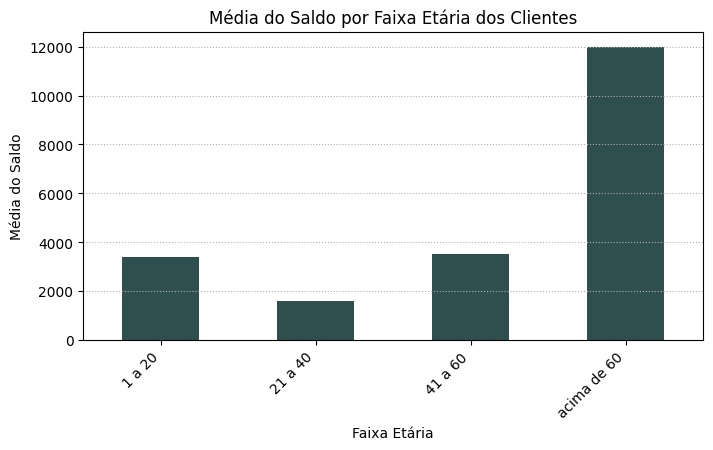

In [15]:
# Gráfico
plt.figure(figsize=(8, 4))

media_saldo_por_faixa_etaria.plot(kind='bar', color='#2F4F4F')

plt.xlabel('Faixa Etária')
plt.ylabel('Média do Saldo')
plt.title('Média do Saldo por Faixa Etária dos Clientes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle=':')

plt.show()

# 07
Existe alguma relação entre a média de idade dos clientes com os produtos comprados?

In [16]:
#Dataframe
media_idade_por_produto = df.groupby('produto')['idade'].mean()
media_idade_por_produto

produto
Fone de ouvido modelo A    37.750000
Laptop modelo Y            36.176471
Smartphone modelo X        35.090909
Smartphone modelo Z        40.000000
Smartwatch modelo Z        28.000000
Tablet modelo B            35.666667
Name: idade, dtype: float64

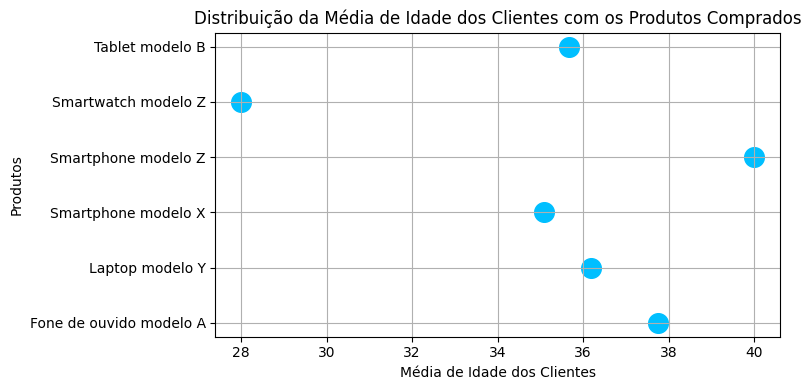

In [17]:
# Gráfico
plt.figure(figsize=(8, 4))

plt.scatter(media_idade_por_produto, media_idade_por_produto.index, color='#00BFFF', s=200)

plt.xlabel('Média de Idade dos Clientes')
plt.ylabel('Produtos')
plt.title('Distribuição da Média de Idade dos Clientes com os Produtos Comprados')
plt.grid(True, linestyle='-')
plt.tight_layout()

plt.show()

# 08
Quais são os produtos mais populares em cada faixa etária?

In [18]:
# Dataframe
contagem_compras_por_produto_e_faixa = df.groupby('faxa_etaria')['produto'].value_counts().unstack()
contagem_compras_por_produto_e_faixa

produto,Fone de ouvido modelo A,Laptop modelo Y,Smartphone modelo X,Smartphone modelo Z,Smartwatch modelo Z,Tablet modelo B
faxa_etaria,,,,,,
1 a 20,NaN,1.0,NaN,NaN,NaN,NaN
21 a 40,2.0,12.0,9.0,1.0,3.0,2.0
41 a 60,2.0,3.0,2.0,1.0,NaN,1.0
acima de 60,NaN,1.0,NaN,NaN,NaN,NaN


<Figure size 800x800 with 0 Axes>

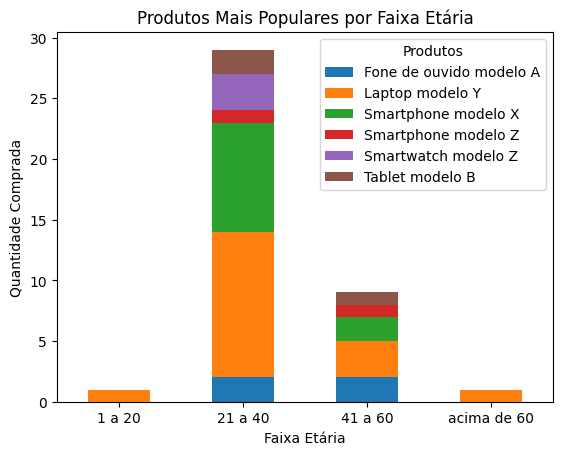

In [19]:
# Gráfico
plt.figure(figsize=(8, 8))

contagem_compras_por_produto_e_faixa.plot(kind='bar', stacked=True)

plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade Comprada')
plt.title('Produtos Mais Populares por Faixa Etária')
plt.legend(title='Produtos')
plt.xticks(rotation=0, ha='center')

plt.show()